# MOwNiT
## Lab2  Julia Smerdel

Zad. 1 Porównanie reprezenacji bitowej liczby 1/3.

In [1]:
bitstring(Float16(1/3)) #Float16

"0011010101010101"

In [2]:
bitstring(Float32(1/3)) #Float32

"00111110101010101010101010101011"

In [3]:
bitstring(Float64(1/3)) #Float64

"0011111111010101010101010101010101010101010101010101010101010101"

In [12]:
num = Float16(23.23)
Float64(num)
# bitstring(Float64(num))

23.234375

Zad 2. Badanie odległości między kolejnymi liczbami zmiennoprzecinkowymi.

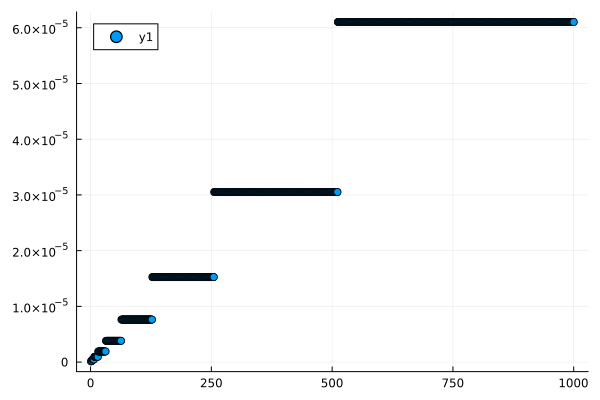

In [1]:
using Plots
arr = Float32[]
for i=1:1000
    push!(arr, eps(Float32(i))) #Maszynowe epsilon mówi, jaki jest odstęp między kolejnymi liczbami zmiennoprzecinkowymi reprezentowanymi w komputerze
end

scatter(1:1000, arr)

Zad 3. Sprawdzenie jak zmienia się cecha oraz mantysa dla coraz mniejszych liczb.


```C
#include <stdio.h>
#include <gsl/gsl_ieee_utils.h>
#include <gsl/gsl_math.h>

int main(){
    gsl_ieee_env_setup();
    float num = 1.0/3.0;
    gsl_ieee_printf_float(&num);
    
    int i = 0;
    while (i < 30){
        num = num/2;
        gsl_ieee_printf_float(&num);
        printf("\n");
        i += 1;
    }
    return 0;
    
}
```

Zad 4. Algorytm niestabilny numerycznie

Przykładem algorytmu niestabilnego numerycznie jest aproksymacja wartości funkcji e^x korzystając z sumy szeregu Taylora.

$ e^x = 1 + x + \frac {x^2}{2!} + \frac{x^3}{3!} + ... $

Dla przykładu policzę wartość dla x=-5.5.

In [24]:
function TaylorE(howManyTimes, x)
    ans::Float16 = 0
    for i=0:howManyTimes
        added = x^i / factorial(big(i)) #big prevents from overflow behaviour
        ans += added
        println("+", added)
    end
    return ans
end

TaylorE (generic function with 1 method)

In [25]:
x = -5.5
result = TaylorE(25, x)
println();

println("Algorithm approximation: ", result)
println("Real approximation: ", exp(x))
println("Difference between aproximations: ", abs(result - exp(x)))

+1.0
+-5.5
+15.125
+-27.72916666666666666666666666666666666666666666666666666666666666666666666666657
+38.12760416666666666666666666666666666666666666666666666666666666666666666666685
+-41.94036458333333333333333333333333333333333333333333333333333333333333333333337
+38.44533420138888888888888888888888888888888888888888888888888888888888888888888
+-30.20704830109126984126984126984126984126984126984126984126984126984126984126983
+20.76734570700024801587301587301587301587301587301587301587301587301587301587292
+-12.69115570983348489858906525573192239858906525573192239858906525573192239858909
+6.98013564040841669422398589065255731922398589065255731922398589065255731922399
+-3.490067820204208347111992945326278659611992945326278659611992945326278659611995
+1.599614417593595492426330099941211052322163433274544385655496766607877718988825
+-0.6767599459049827083342165807443585221362999140776918554696332474110251888029679
+0.2658699787483860639884422281495694194106892519590932289344987757686170

Różnica pomiędzy wartością prawdziwą a aproksymacją jest duża. Przyczyną jest "catastrophic cancellation", która spowodowana jest odejmowaniem bliskich liczb (wynikiem jest mała liczba, mająca dużo zer tam, gdzie jej ”poprzednicy” mieli cyfry znaczące. taka liczba jest normalizowana, zera zapisywane są w wykładniku (cecha), a cała zawartość mantysy przesuwana jest ”w lewo”, nie wiadomo czym zapełnić pojawiające się miejsca w mntysie po prawej stronie (zera lub przypadkowe wartości)).

Aby usunąć ten błąd, wystarczy zastosować przekształcenie:



$ e^x = \frac {1}{e^{-x}} $

$ e^{-5.5} = \frac {1}{1 + 5.5 + 12.125+...} $

In [22]:
function TaylorE2(howManyTimes, x)
    ans::Float16 = 0
    for i=0:howManyTimes
        ans += x^i / factorial(big(i))
    end
    return ans
end

TaylorE2 (generic function with 1 method)

In [29]:
println("Algorithm approximation: ", 1/TaylorE2(25, 5.5))
println("Real approximation: ", exp(-5.5))
println("Difference between aproximations: ", Float16(abs(1/TaylorE2(25, 5.5) - exp(-5.5))))

Algorithm approximation: 0.004086
Real approximation: 0.004086771438464067
Difference between aproximations: 1.25e-6


Po zmianie algorytmu różnica pomiędzy wynikami różni się o liczbę rzędu $ 10^{-6} $, co świadczy o poprawie dokładności algorytmu.